# Vaccination Rates and how it effects disease spread
In this model we looked at how vaccination of a population could help protect unvaccinated individuals.  We took a model we had done in class previously (Corona_Virus_Model) and then building off that code we not only added data points that could be vaccinated, but we also added periods of infectability (allows nodes to recover after beign infected for a set period of time) and added a probability of transmission from one node to another.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [22]:
class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_people = 100
        self.n_steps = 500
        self.vmin = 0.01
        self.vmax = 5*self.vmin
        self.v_decay = 0.9
        self.arena_size = 3
        self.infect_period = 50
        self.social_distance = 0.1**2 
        self.n_vacc_steps = 50
        self.vacc_rate = .3
        self.transmission_rate = .5

In [14]:
def og_pan(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)
        vx = np.zeros(c.n_people)
        vy = np.zeros(c.n_people)
        infected = np.zeros(c.n_people)
        infected[0] = 1 # Patient zero
        
        stats = np.zeros(c.n_steps) # What is reported from every trial
    
        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            if np.sum(infected==0) == 0: # If all are infected, no need to model that
                stats[t] = 1
                continue
                
            x += vx
            y += vy
            
            vx = vx*c.v_decay + np.random.randn(c.n_people)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_people)*c.vmin 
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
            #vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            #vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_people):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.social_distance)
                    infected[victims] = 1
                
            stats[t] = np.sum(infected)/c.n_people
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'k.', markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'r.', markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                if t % 100 == 0:
                    print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = stats
    return np.mean(history, axis=1)

In [16]:
def new_pan(c, show_dotses=False, n_trials=1,reinitalize = False, chunk1 = .9, chunk2 = .8, chunk3 = .1, chunk4 = 0):
    history = np.zeros((c.n_steps, n_trials))
    #data = np.zeros((n_trials, c.n_people, 2))
    infect_period = c.infect_period + 1
    for i_trial in range(n_trials):
        vx = np.zeros(c.n_people)
        vy = np.zeros(c.n_people)
        if reinitalize:
            Vaccination_Prob = np.zeros(shape = (c.n_people,c.n_vacc_steps))
            infected = np.zeros(c.n_people)
            x = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)
            y = np.random.uniform(low=0, high=c.arena_size, size=c.n_people)    
            vx = np.zeros(c.n_people)
            vy = np.zeros(c.n_people)
            for t in range(c.n_vacc_steps):
                x += vx
                y += vy
                vx = vx*c.v_decay + np.random.randn(c.n_people)*c.vmin 
                vy = vy*c.v_decay + np.random.randn(c.n_people)*c.vmin
                vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
                vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
                x = np.maximum(0,np.minimum(x, c.arena_size)) 
                y = np.maximum(0,np.minimum(y, c.arena_size))
                for i in range(c.n_people):                            
                    if x[i] <= (c.arena_size/2) and y[i] <= (c.arena_size/2):
                        Vaccination_Prob[i,t] = chunk1
                    elif x[i] > (c.arena_size/2) and y[i] <= (c.arena_size/2):
                        Vaccination_Prob[i,t] = chunk2
                    elif x[i] <= (c.arena_size/2) and y[i] > (c.arena_size/2):
                        Vaccination_Prob[i,t] = chunk3
                    elif x[i] > (c.arena_size/2) and y[i] > (c.arena_size/2):
                        Vaccination_Prob[i,t] = chunk4
            Vaccinated = Vaccination_Prob.mean(1)
        for i in range(c.n_people):
            if Vaccinated[i] > c.vacc_rate:
                infected[i] = c.infect_period + 5
            #data[i_trial,:c.n_people,1] = Vaccinated 
        
        infected[0] = 1
        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            
            vx = vx*c.v_decay + np.random.randn(c.n_people)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_people)*c.vmin 
            
            x += vx
            y += vy
            
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i in range(c.n_people):
                if infected[i]>=1 and infected[i]<=c.infect_period:
                    d = np.square(x-x[i]) + np.square(y-y[i])
                    near = np.argwhere(d < c.social_distance)
                    for n in near:
                        if np.all(infected[near]) == int(0):
                            transmission_prob = np.random.uniform()
                            if transmission_prob < c.transmission_rate:
                                infected[near] = 1
                    infected[i] += 1
                else:
                    continue
                #data[i_trial,:c.n_people,0] = infected
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected<=c.infect_period], y[infected<=c.infect_period],'r.', markersize=5)
                plt.plot(x[infected==infect_period], y[infected==infect_period],'c.', markersize=5)
                plt.plot(x[infected==0], y[infected==0], 'y.',markersize=5);
                plt.plot(x[infected>infect_period], y[infected>infect_period],'b.', markersize=5)
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
        #messy_data = np.zeros((n_trials,c.n_people, 2))
        #messy_data[i_trial,:c.n_people,0] = data[i_trial,:c.n_people,0]
        #messy_data[i_trial,:c.n_people,1] = data[i_trial,:c.n_people,1]*100
        #for i in range(c.n_people):
        #    if messy_data[i_trial,i,0] > 0:
        #        messy_data[i_trial,i,0] = 1
        #    if messy_data[i_trial,i,1] > c.vacc_rate*100:
        #        #delete row
        #        continue
    return np.mean(messy_data, axis=0)

In [18]:
#data = np.random.uniform(size = (10,2))
#messy_data = np.zeros(shape = (10,2))
#messy_data[:10,0] = data[:10,0]*100
#messy_data[:10,1] = data[:10,1]
#for i in range(10):
#    if messy_data[i,0] >50 and messy_data[i,0] < 90:
#        messy_data[i,0] = 1
#    if messy_data[i,1] >.5:
#        np.delete(messy_data,i,0)
#print(data)
#print(messy_data)

<IPython.core.display.Javascript object>


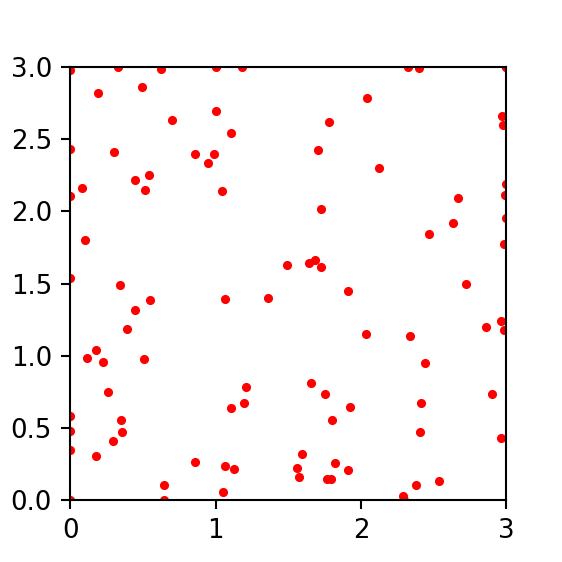

<IPython.core.display.Javascript object>


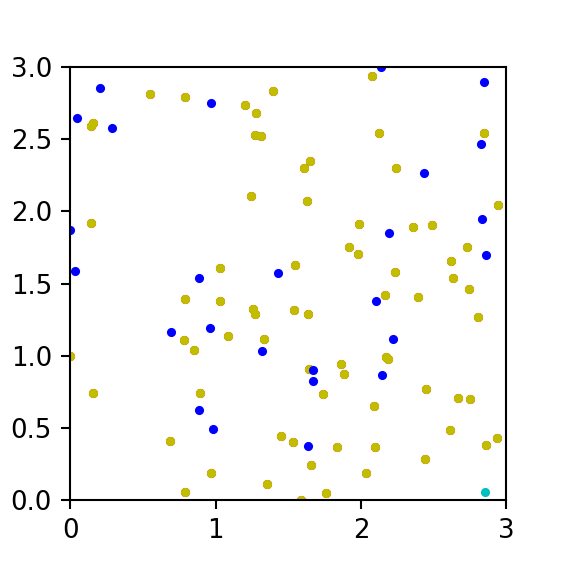

In [23]:
c = Const()
dots = og_pan(c, show_dotses=True, n_trials=1)
more_dots = new_pan(c, show_dotses=True,reinitalize = True,n_trials =1, chunk1 = .2, chunk2 = .8, chunk3 = .1, chunk4 = 0);



After looking at the results it's clear that vaccination of some of the population could protect unvaccinated idividuals, but by changing the c.vacc_rate variable it would soon become clear that the more people that are vaccinated, the higher probability of the disease only fewer people.  Going back through the code you'll see the remains of an idea that has been currently laid to rest (if I get bored enoough I might continue playing with this model during the summer).  What I had wanted to do is to produce a histogram of the data showing the number of infected people and the x-axos would have been the Vaccinated variable split up into bins of 0.1 and the cut off for the histogram would have been the vaccination threshold.